This document copies code from Qinfer/qinfer-examples/simple_precession_estimation.ipynb.

In [1]:
from __future__ import division, print_function
import qinfer as qi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
try: plt.style.use('ggplot')
except: pass

/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/QInfer-1.0b4-py2.7.egg/qinfer/parallel.py:53: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pyl

Setup some data for a simple precession model.

In [2]:
true_omega = 70.3
omega_min, omega_max = [0, 99.1]
n_shots = 20

ts = np.pi * (1 + np.arange(100)) / (2 * omega_max)

signal = np.sin(true_omega * ts / 2) ** 2
counts = np.random.binomial(n=n_shots, p=signal)

data = np.column_stack([counts, ts, n_shots * np.ones_like(counts)])

Use a Bayes estimator on part of the data, and in particular extract the resulting `SMCUpdater`

In [3]:
mean, cov, extra = qi.simple_est_prec(data[:50,:], freq_min=omega_min, freq_max=omega_max, return_all=True,n_particles=10000)
print (mean, cov)
u = extra['updater']

70.3431481804 0.00553497566398


Now ask for the risk of performing 20 shots of an experiment, and ask for this for each time in the list `ts`

/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/dist-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


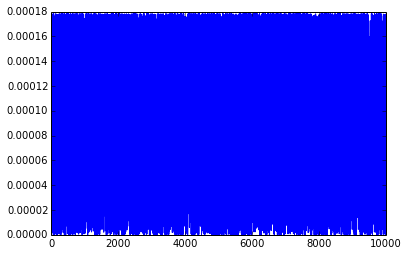

In [4]:
plt.plot(u.particle_weights)
risks1 = np.array(list(u.bayes_risk(np.array([(t, 20)],dtype=u.model.expparams_dtype)) for t in ts))

Now resample the updater (even though we have not provided any new data) and ask for the risk again.

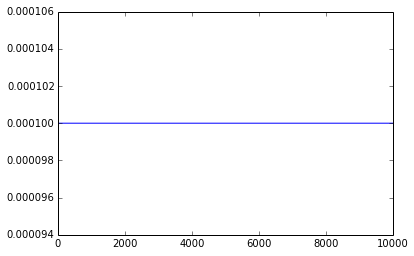

In [5]:
u.resample()
plt.plot(u.particle_weights)
risks2 = np.array(list(u.bayes_risk(np.array([(t, 20)],dtype=u.model.expparams_dtype)) for t in ts))

Now resample the updater (even though we have not provided any new data) and ask for the risk again.

/usr/local/lib/python2.7/dist-packages/QInfer-1.0b4-py2.7.egg/qinfer/smc.py:486: ResamplerWarning: Resampling without additional data; this may not perform as desired.


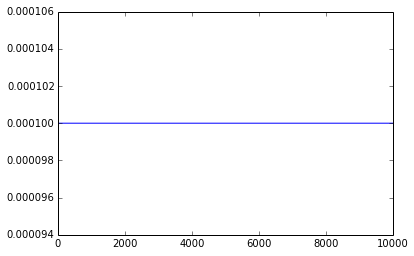

In [6]:
u.resample()
plt.plot(u.particle_weights)
risks3 = np.array(list(u.bayes_risk(np.array([(t, 20)],dtype=u.model.expparams_dtype)) for t in ts))

Now resample the updater (even though we have not provided any new data) and ask for the risk again.

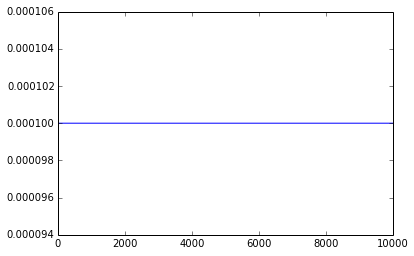

In [7]:
u.resample()
plt.plot(u.particle_weights)
risks4 = np.array(list(u.bayes_risk(np.array([(t, 20)],dtype=u.model.expparams_dtype)) for t in ts))

Now plot the result in each case. They should all be the same.

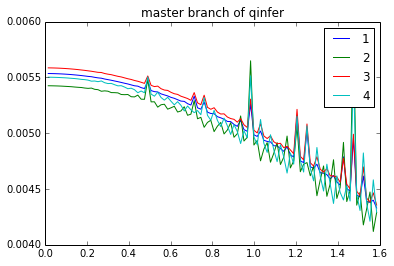

In [8]:
plt.plot(ts, risks1, ts, risks2, ts, risks3, ts, risks4)
plt.legend(['1','2','3','4'])
plt.title('master branch of qinfer')

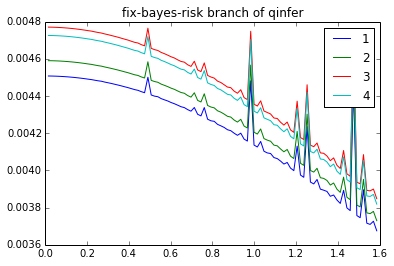

In [9]:
plt.plot(ts, risks1, ts, risks2, ts, risks3, ts, risks4)
plt.legend(['1','2','3','4'])
plt.title('fix-bayes-risk branch of qinfer')